In [20]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Ylhjn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv"
df = pd.read_csv(url)

In [22]:
df.head()


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [24]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [25]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [26]:
df['age']=df['age'].fillna(df['age'].mean()) #заполнили пропуск средним значением по столбцу

In [27]:
df.info() #посмотрели точно ли заполнился пропуск

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        41 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [28]:
df.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [29]:
for age in df['age']:
    if age<0 or age>100:
        print('неадекватный возраст', age) 

неадекватный возраст 120.0


In [30]:
for id in df['user_id']:
    if id>40 or id<0:
        print('неадекватный id ', id)

In [31]:
for cntr in df['country']:
    if len(cntr)>3 or cntr.upper()!=cntr:
        print('страна написана не капсом или полное название страны', cntr)

In [32]:
for i in df['purchases']:
    if i<0:
        print('отрицательное количество покупок', i)

отрицательное количество покупок -1


In [33]:
for i in df['revenue']:
    if i<0:
        print('отрицательный доход')

в lde[] из четырех столбцах с некатегориальными признаками ничего не вывело, значит с данными в этих столбцах все в порядке,
одно из значений количества покупок отрицательное и равно -1
одно из значений возраста равно 120 

In [34]:
print(df['country'].value_counts())

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [35]:
df.groupby(['country']).mean() #средние значения по странам 

,user_id,age,purchases,revenue
country,,,,
CN,10.000000,24.000000,4.500000,1054.000000
DE,24.666667,34.918803,6.500000,1445.500000
FR,20.666667,46.250000,4.250000,675.916667
RU,18.076923,30.076923,4.769231,790.076923
US,22.375000,36.689103,4.625000,557.375000


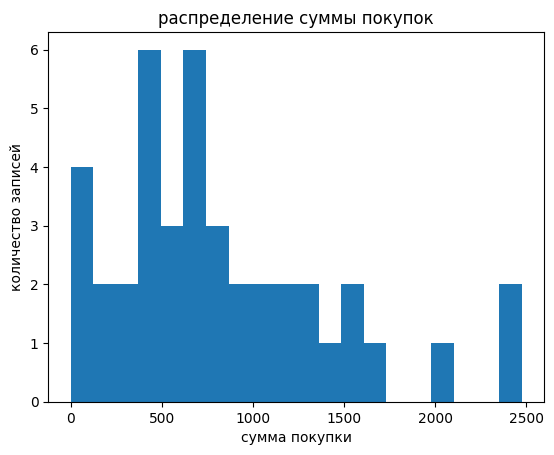

In [36]:
plt.hist(df['revenue'], bins = 20)
plt.title('распределение суммы покупок')
plt.xlabel('сумма покупки')
plt.ylabel('количество записей')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x269e07bd210>,
 'caps': [<matplotlib.lines.Line2D at 0x269e07b16d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x269e07bc910>],
 'medians': [<matplotlib.lines.Line2D at 0x269e07bf750>],
 'fliers': [<matplotlib.lines.Line2D at 0x269e07c4090>],
 'means': []}

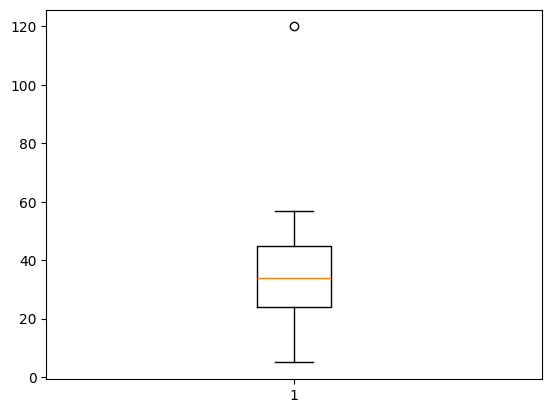

In [37]:
plt.boxplot(df['age'])

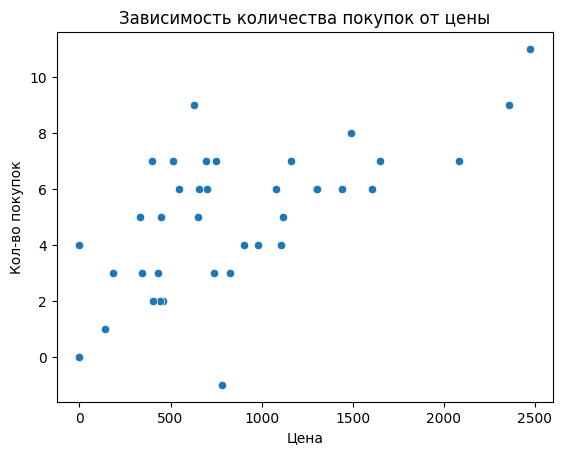

In [39]:
sns.scatterplot(data=df, x='revenue', y='purchases')
plt.title('Зависимость количества покупок от цены')
plt.xlabel('Цена')
plt.ylabel('Кол-во покупок')

plt.savefig('C:/Users/Ylhjn/Desktop/projec/mirea/homeworks/HW02/figures/my_plot.pdf', 
           dpi=300, 
           bbox_inches='tight',
           format='pdf')
plt.show()
